In [6]:
import ezkl
import torch
from torch import nn
import json
import os
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math

In [7]:
%run -i ../../bench.py

In [8]:
data_50_path = os.path.join('data_50.json')
data_100_path = os.path.join('data_100.json')
data_300_path = os.path.join('data_300.json')
data_600_path = os.path.join('data_600.json')
data_1000_path = os.path.join('data_1000.json')

In [9]:
def gen_param_func(data_tensor_array):
    # for 1 value, just have 1 element in tensor array
    data_tensor = data_tensor_array[0]
    return [torch.sqrt(torch.var(data_tensor, correction = 1)),torch.mean(data_tensor)]

def model_func(param):
    class verifier_model(nn.Module):
        def __init__(self):
            super(verifier_model, self).__init__()
            self.w = nn.Parameter(data = param[0], requires_grad = False)
            self.data_mean = nn.Parameter(data = param[1], requires_grad = False)

        def forward(self,X):
            # here is witness approach
            x_mean_cons = torch.abs(torch.sum(X)-X.size()[1]*(self.data_mean))<=torch.abs(0.01*X.size()[1]*self.data_mean)
            return (torch.logical_and(torch.abs(torch.sum((X-self.data_mean)*(X-self.data_mean))-self.w*self.w*(X.size()[1]-1))<=torch.abs(0.02*self.w*self.w*(X.size()[1]-1)),x_mean_cons),self.w)
    return verifier_model

sm_time =[0,0,0,0,0]
med_time = [0,0,0,0,0]
lar_std_time = [0,0,0,0,0]

Summary of Proving Time (1% accuracy)

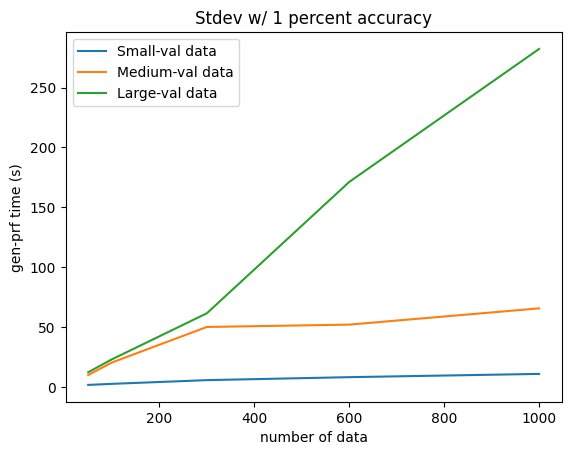

In [50]:
# Hence calibrate scale accordingly to compres the circuit size as long as the answer still within 1 percent
import matplotlib.pyplot as plt
data_number = [50, 100, 300, 600, 1000]
sm_time = [1.5607101917266846, 2.4587819576263428, 5.554161787033081, 8.046887874603271, 10.768648147583008]
plt.title("Stdev w/ 1 percent accuracy")
plt.xlabel("number of data")
plt.ylabel("gen-prf time (s)")
plt.plot(data_number, sm_time, label = 'Small-val data')

med_time = [9.816512107849121, 20.31772804260254, 49.992668867111206, 51.95100998878479, 65.53548407554626]
plt.plot(data_number, med_time, label = 'Medium-val data')

# BIG DATA, which results in std = thousands --> circuit size TOO BIG since (x-x_mean)^2 is huge
# Instead we geenerate data_std_lar set for Big data but std is just around 200, it works!

lar_time = [12.159341096878052, 22.946807146072388, 61.43207502365112, 171.2206380367279, 282.3612780570984]
plt.plot(data_number, lar_time, label = 'Large-val data')


plt.legend()


Here, we can see that graph is no longer the same among small, medium, and large because stdev depends on the square which makes big number blowup.

=============================================================================================================

Small-Valued Data: value 0-1, 3 decimals on 50, 100, 300, 600, 1000 data

In [10]:
sm_time[0] = bench_one(data_50_path,['small'] ,model_func,gen_param_func, "50 small values","default",12, "resources")

Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  50 small values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-10876, 0], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-10876

Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.


gen prf time:  1.5607101917266846
Theory result:  tensor(0.3007, dtype=torch.float64)
Our result:  [0.30078125]


In [11]:
sm_time[1] = bench_one(data_100_path,['small'] ,model_func,gen_param_func, "100 small values",'default',13, "resources")

Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  100 small values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-23846, 0], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-2384

Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.


gen prf time:  2.4587819576263428
Theory result:  tensor(0.3057, dtype=torch.float64)
Our result:  [0.3046875]


In [12]:
sm_time[2] = bench_one(data_300_path,['small'] ,model_func,gen_param_func, "300 small values",'default',14, "resources")

=====================================  300 small values  =====================================


Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-63208, 8], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 1521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-63208, 8], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibili

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  5.554161787033081
Theory result:  tensor(0.2847, dtype=torch.float64)
Our result:  [0.28515625]


In [13]:
sm_time[3] = bench_one(data_600_path,['small'] ,model_func,gen_param_func, "600 small values",'default',15, "resources")

=====================================  600 small values  =====================================


Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 1, 'lookup_range': [-1520, 33282], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 3621, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 256.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 1, 'lookup_range': [-1520, 33282], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['ba

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  8.046887874603271
Theory result:  tensor(0.2888, dtype=torch.float64)
Our result:  [0.2890625]


In [14]:
sm_time[4] = bench_one(data_1000_path,['small'] ,model_func,gen_param_func, "1000 small values",'default',16, "resources")

=====================================  1000 small values  =====================================


spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 1, 'lookup_range': [-2490, 34322], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 6021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 256.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 1, 'lookup_range': [-2490, 34322], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['ba

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  10.768648147583008
Theory result:  tensor(0.2906, dtype=torch.float64)
Our result:  [0.2890625]


=============================================================================================================

Medium data: value 1-100, 1 decimal on 50, 100, 300, 600, 1000 data

In [43]:
med_time[0] = bench_one(data_50_path,['medium'] ,model_func,gen_param_func, "50 medium values",[3],15, "resources")

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-106052, 0], 'logrows': 17, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-106

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  9.816512107849121
Theory result:  tensor(29.3159, dtype=torch.float64)
Our result:  [29.375]


In [17]:
med_time[1] = bench_one(data_100_path,['medium'] ,model_func,gen_param_func, "50 medium values",[3],16, "resources")

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-217128, 0], 'logrows': 18, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-217

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  20.31772804260254
Theory result:  tensor(29.4151, dtype=torch.float64)
Our result:  [29.375]


In [20]:
med_time[2] = bench_one(data_300_path,['medium'] ,model_func,gen_param_func, "300 medium values",[3],17, "resources")

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  300 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-72128, 336200], 'logrows': 19, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 1821, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multip

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  49.992668867111206
Theory result:  tensor(27.4602, dtype=torch.float64)
Our result:  [27.5]


In [21]:
med_time[3] = bench_one(data_600_path,['medium'] ,model_func,gen_param_func, "600 medium values",[3],17, "resources")

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0


=====================================  600 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-149548, 324818], 'logrows': 19, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 3621, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multi

spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  51.95100998878479
Theory result:  tensor(27.9471, dtype=torch.float64)
Our result:  [28.0]


In [44]:
med_time[4] = bench_one(data_1000_path,['medium'] ,model_func,gen_param_func, "1000 medium values",[3],17, "resources")

=====================================  1000 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-264942, 331298], 'logrows': 20, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 6021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_mult

Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
spawning module 0
spawning module 2
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
spawning module 0
spawning module 2
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
spawning module 0
spawning module 2
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.


gen prf time:  65.53548407554626
Theory result:  tensor(28.8109, dtype=torch.float64)
Our result:  [28.75]


=============================================================================================================

Large-valued data: value 100-1000, 0 decimal on 50, 100, 300, 600, 1000 data

In [30]:
lar_std_time[0] = bench_one(data_50_path,['large'] ,model_func,gen_param_func, "50 large values",[0],15, "resources")

Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  50 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-147950, 22], 'logrows': 18, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-147

Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
spawning module 0
spawning module 2
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
spawning module 0
spawning module 2
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.


gen prf time:  12.159341096878052
Theory result:  tensor(274.7643, dtype=torch.float64)
Our result:  [275.0]


In [36]:
lar_std_time[1] = bench_one(data_100_path,['large'] ,model_func,gen_param_func, "100 large values",[0],16, "resources")

Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  100 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-291568, 20], 'logrows': 19, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-29

Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
spawning module 0
spawning module 2
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
spawning module 0
spawning module 2
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.


gen prf time:  22.946807146072388
Theory result:  tensor(271.3548, dtype=torch.float64)
Our result:  [271.0]


In [45]:
lar_std_time[2] = bench_one(data_300_path,['large'] ,model_func,gen_param_func, "300 large values",[0],18, "resources")

Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  300 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-772420, 126], 'logrows': 20, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 1521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': 

Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.


gen prf time:  61.43207502365112
Theory result:  tensor(254.1537, dtype=torch.float64)
Our result:  [254.0]


In [46]:
lar_std_time[3] = bench_one(data_600_path,['large'] ,model_func,gen_param_func, "600 large values",[0],19, "resources")

=====================================  600 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-1597336, 28], 'logrows': 21, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 3021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': 

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  171.2206380367279
Theory result:  tensor(258.2014, dtype=torch.float64)
Our result:  [258.0]


In [47]:
lar_std_time[4] = bench_one(data_1000_path,['large'] ,model_func,gen_param_func, "1000 large values",[0],20, "resources")

=====================================  1000 large values  =====================================


Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-2685184, 476], 'logrows': 22, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 5021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-2685184, 476], 'logrows': 20, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_

spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.


gen prf time:  282.3612780570984
Theory result:  tensor(259.2464, dtype=torch.float64)
Our result:  [259.0]
